# Implementation of ANN using Keras:

In [1]:
# Importing Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# checking the version of Tensorflow
tf.__version__

'2.15.0'

# CPU / GPU Check

In [3]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} is not available!")

GPU is available!
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# Creating a simple classifier using Keras on MNIST data

In [6]:
mnist = tf.keras.datasets.mnist
(X_train_full , y_train_full),(X_test, y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
len(X_test[1][0])

28

In [11]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [17]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range

X_valid , X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255.
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]

# scale the test set as well
X_test = X_test/255.

In [15]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [18]:
len(X_train_full[5000:])

55000

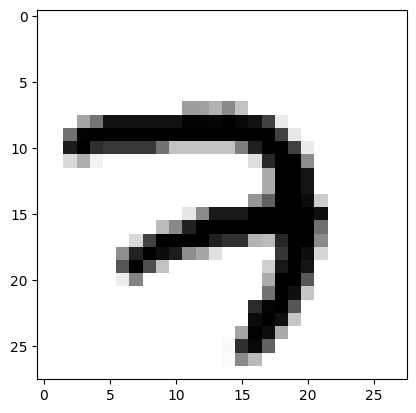

In [19]:
# Lets view some data
plt.imshow(X_train[0], cmap='binary')
plt.show()

<Axes: >

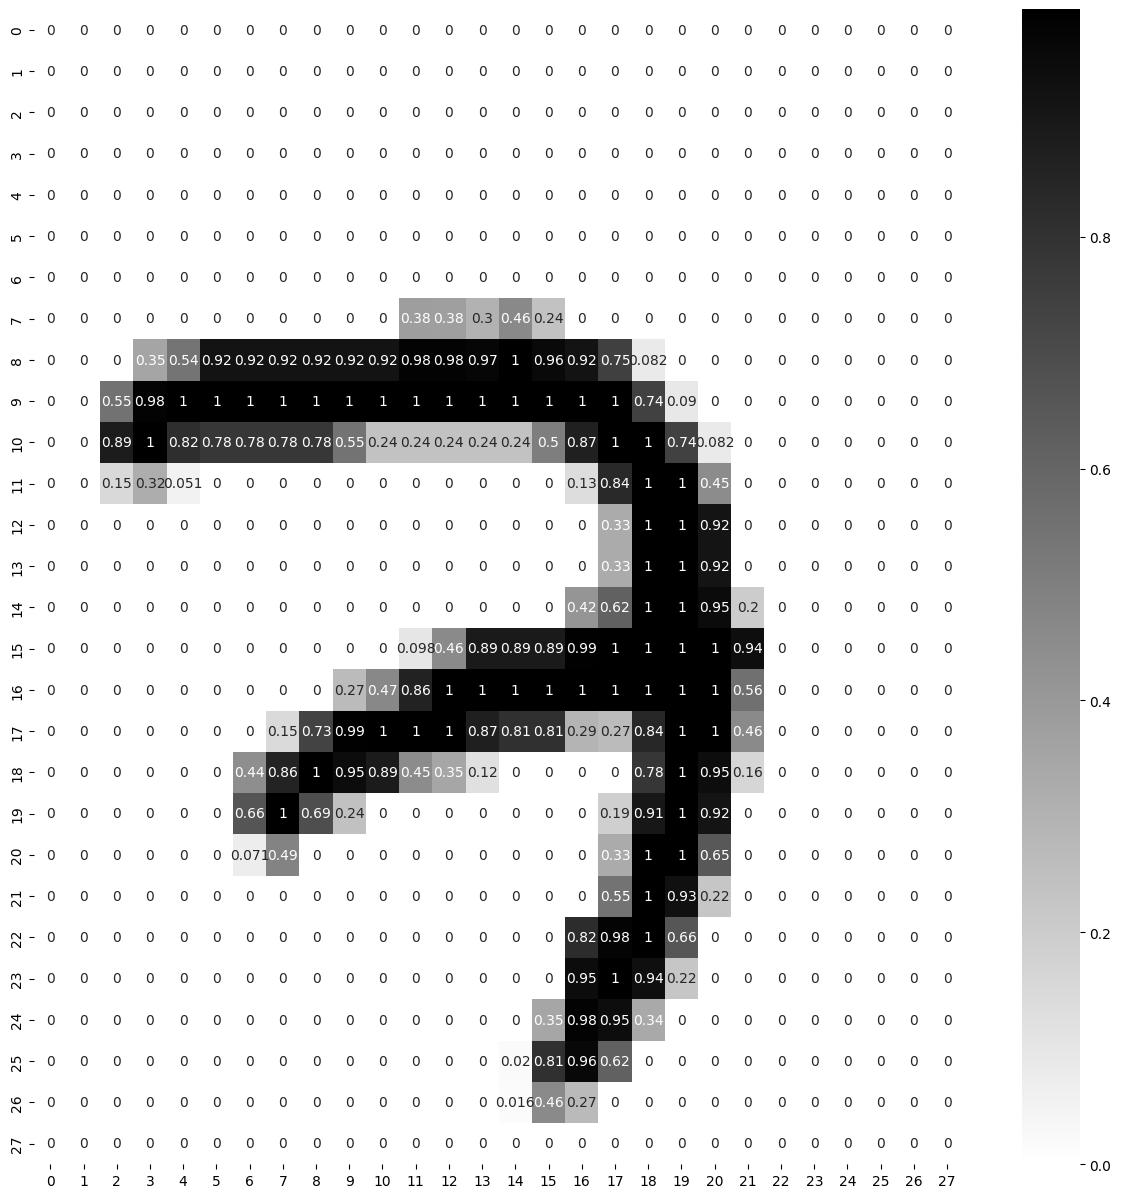

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True ,cmap='binary')

# Architecture Used:
<img src="https://github.com/entbappy/Branching-tutorial/blob/master/9.png?raw=true"
width="500"
height="300">

In [23]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name='inputLayer'),
          tf.keras.layers.Dense(300, activation='relu' , name='hiddeLayer1'),
          tf.keras.layers.Dense(100, activation='relu' , name='hiddeLayer2'),
          tf.keras.layers.Dense(10, activation='softmax' , name='outputLayer')
          ]

model_clf = tf.keras.models.Sequential(LAYERS)

In [24]:
model_clf.layers

In [26]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddeLayer1 (Dense)         (None, 300)               235500    
                                                                 
 hiddeLayer2 (Dense)         (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# first Layer * second Layer + bias
784*300 + 300, 300*100 + 100 , 100*10 + 10

(235500, 30100, 1010)

In [28]:
# Total parameters to be trained
sum((235500, 30100, 1010))

266610

In [29]:
hidden1 = model_clf.layers[1]
hidden1.name


'hiddeLayer1'

In [30]:
len(hidden1.get_weights()[1])

300

In [31]:
hidden1.get_weights()

[array([[-0.03019382,  0.03180129, -0.01794794, ..., -0.03855252,
          0.01457758,  0.03775527],
        [-0.01670017, -0.00191276,  0.04632026, ...,  0.06885548,
         -0.03826885,  0.07204734],
        [-0.03033432,  0.0218483 ,  0.02751583, ..., -0.00201103,
         -0.05376287,  0.02972181],
        ...,
        [ 0.00856221, -0.0418497 ,  0.05622806, ...,  0.05818924,
         -0.0544923 ,  0.02265273],
        [ 0.03080162,  0.0493915 ,  0.06827722, ..., -0.00471304,
         -0.07388006, -0.01955953],
        [-0.00639279, -0.06748062, -0.00846227, ...,  0.00207043,
          0.04715165,  0.01740215]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [32]:
weights , biases = hidden1.get_weights()

In [33]:
weights.shape

(784, 300)

In [34]:
biases.shape

(300,)

In [36]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION ,
                   optimizer=OPTIMIZER,
                   metrics=METRICS)

In [39]:
#training
EPOCHS = 30
VALIDATION_SET = (X_valid , y_valid)

history = model_clf.fit(X_train, y_train , epochs=EPOCHS , validation_data = VALIDATION_SET , batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0266 - accuracy: 0.9940 - val_loss: 0.0661 - val_accuracy: 0.9824
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0253 - accuracy: 0.9942 - val_loss: 0.0673 - val_accuracy: 0.9814
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0239 - accuracy: 0.9947 - val_loss: 0.0678 - val_accuracy: 0.9816
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0224 - accuracy: 0.9953 - val_loss: 0.0639 - val_accuracy: 0.9822
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0214 - accuracy: 0.9957 - val_loss: 0.0644 - val_accuracy: 0.9828
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0203 - accuracy: 0.9963 - val_loss: 0.0628 - val_accuracy: 0.9838
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0193 - accuracy: 0.9964 - val_loss: 0.0643 - val_accuracy:

In [40]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [41]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.026618,0.993982,0.066097,0.9824
1,0.025319,0.994236,0.067286,0.9814
2,0.023909,0.994691,0.067821,0.9816
3,0.022427,0.995255,0.063877,0.9822
4,0.021400,0.995673,0.064429,0.9828
5,0.020289,0.996309,0.062784,0.9838
6,0.019258,0.996364,0.064343,0.9822
7,0.018117,0.996982,0.061923,0.9822
8,0.017271,0.996982,0.064939,0.9830
9,0.016471,0.997418,0.063979,0.9820


<Axes: >

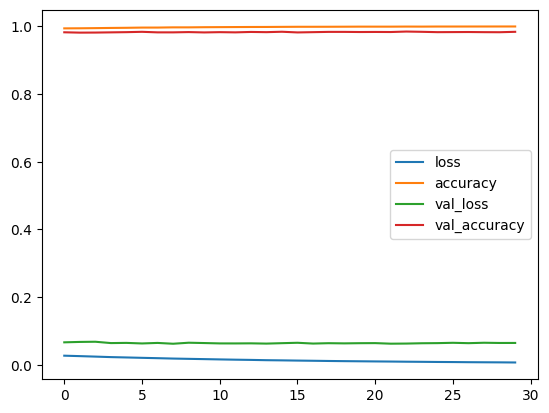

In [42]:
pd.DataFrame(history.history).plot()

In [43]:
model_clf.evaluate(X_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0693 - accuracy: 0.9806


[0.06928204745054245, 0.9805999994277954]

In [44]:
x_new = X_test[:3]

In [45]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [46]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)


1/1 [==============================] - 0s 126ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [47]:
y_prob

array([[2.2450351e-08, 3.4463090e-09, 2.6470406e-07, 5.3209533e-06,
        4.2513784e-10, 1.7550841e-08, 7.4720063e-15, 9.9999416e-01,
        1.4435496e-08, 2.0477306e-07],
       [3.5992664e-09, 2.5643760e-07, 9.9999964e-01, 1.4658184e-07,
        1.3365294e-16, 2.9535832e-11, 2.2908460e-09, 4.3810933e-15,
        8.6112326e-09, 3.2868698e-18],
       [2.2983988e-07, 9.9974352e-01, 1.2889469e-05, 2.8836753e-06,
        2.7423681e-05, 6.6029048e-07, 1.5356021e-06, 2.8555933e-05,
        1.8229344e-04, 5.8547464e-08]], dtype=float32)

In [49]:
y_pred = np.argmax(y_prob , axis=1)

In [50]:
y_pred

array([7, 2, 1])

In [51]:
actual

array([7, 2, 1], dtype=uint8)

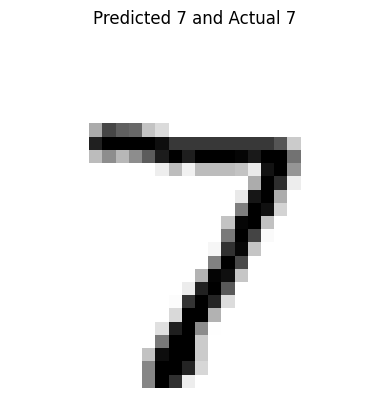

################################


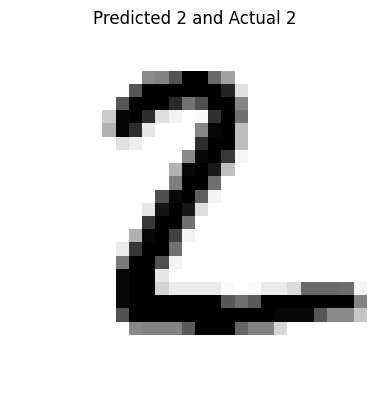

################################


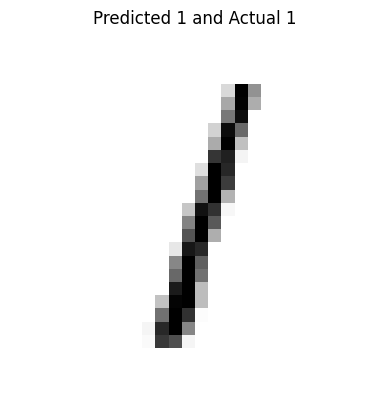

################################


In [52]:
#plot

for data , pred , actual_data in  zip(x_new , y_pred , actual):
  plt.imshow(data, cmap='binary')
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("################################")